<a href="https://colab.research.google.com/github/sudeepbhagat11/ML-LAB-102217257/blob/main/ML_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Implement the K-Means algorithm for clustering the dataset given at the following
link after omitting the last attribute:

https://drive.google.com/file/d/1O_NwpJT-8xGfU_-3llUl2sgPu0xllOrX/view?usp=sharing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/USA_Housing.csv')

# Drop the last column (omit last attribute)
data = data.iloc[:, :-1]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [ ]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


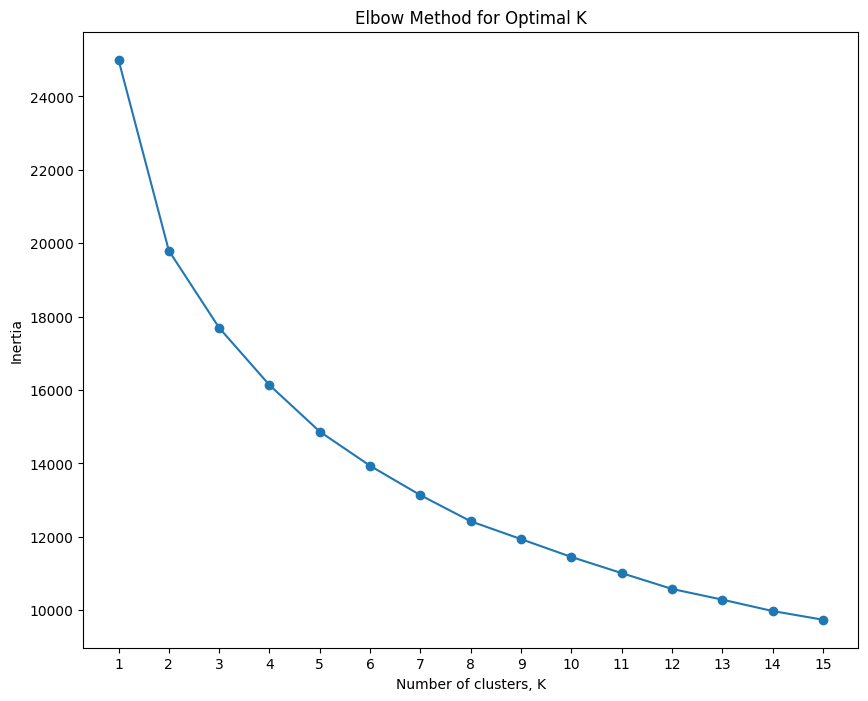

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
K_values = range(1, 16)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(K_values, inertia, marker='o')
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')
plt.xticks(K_values)
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:

K_optimal = 3  # Based on the elbow curve
kmeans_final = KMeans(n_clusters=K_optimal, random_state=42)
kmeans_final.fit(data_scaled)

# Add cluster labels to the dataset
data['Cluster'] = kmeans_final.labels_


In [ ]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Cluster
0,79545.45857,5.682861,7.009188,4.09,23086.80050,0
1,79248.64245,6.002900,6.730821,3.09,40173.07217,0
2,61287.06718,5.865890,8.512727,5.13,36882.15940,2
3,63345.24005,7.188236,5.586729,3.26,34310.24283,0
4,59982.19723,5.040555,7.839388,4.23,26354.10947,2
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,0
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,0
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,0
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,2


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(data_scaled, kmeans_final.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.16


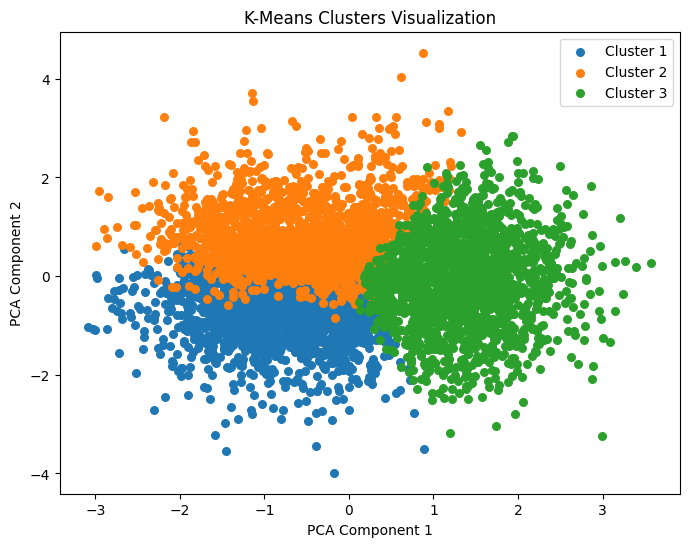

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for plotting, if necessary
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(K_optimal):  # Use the optimal K from elbow method
    plt.scatter(data_2d[kmeans_final.labels_ == i, 0],
                data_2d[kmeans_final.labels_ == i, 1],
                label=f'Cluster {i+1}', s=30)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters Visualization')
plt.legend()
plt.show()


2. Implement the K-Medoids algorithm for clustering the dataset given at the above
specified link.


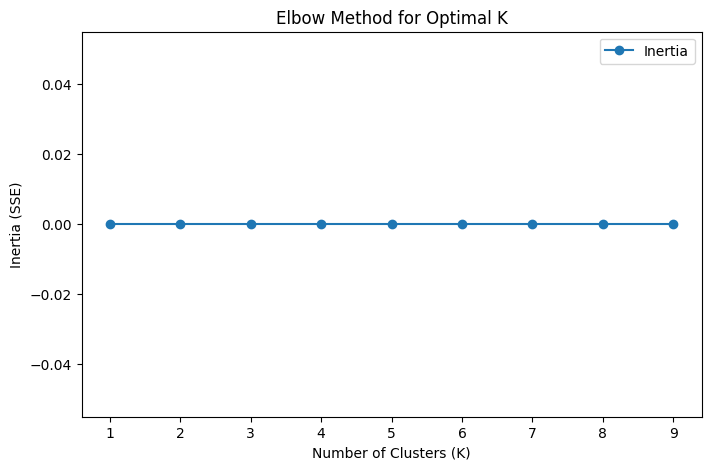

Optimal K: 1


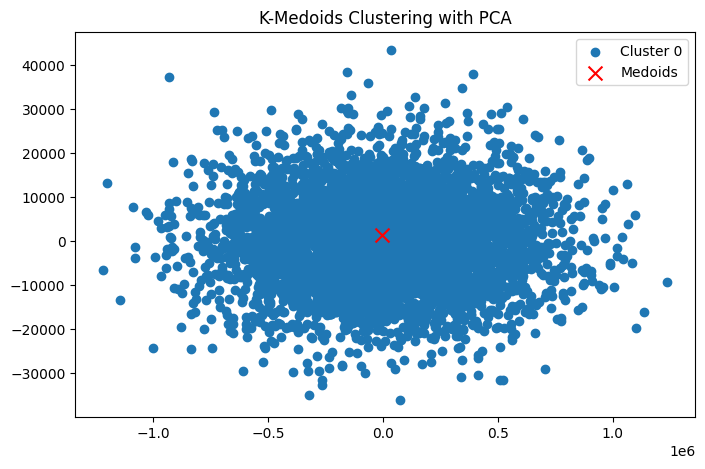

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

# Load the dataset
file_path = '/content/USA_Housing.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocessing: Convert data to numpy array
X = data.values  # Assuming no non-numeric columns

# Function to calculate inertia (sum of squared distances to nearest medoid)
def calculate_inertia(clusters, medoids, X):
    inertia = 0
    for cluster_idx, medoid in clusters.items():
        inertia += np.sum(np.linalg.norm(X[clusters[cluster_idx]] - X[medoid], axis=1)**2)
    return inertia

# K-Medoids Algorithm
def k_medoids(X, k, max_iters=100):
    n_samples = X.shape[0]
    medoids = np.random.choice(n_samples, k, replace=False)  # Initialize medoids randomly
    prev_medoids = np.zeros(k)
    clusters = {}
    for iteration in range(max_iters):
        # Assign each point to the nearest medoid
        clusters = {i: [] for i in range(k)}
        for idx, point in enumerate(X):
            distances = [np.linalg.norm(point - X[medoid]) for medoid in medoids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(idx)

        # Update medoids
        for cluster_idx in clusters:
            cluster_points = X[clusters[cluster_idx]]
            distances = pairwise_distances(cluster_points, metric='euclidean')
            medoid_idx = np.argmin(distances.sum(axis=0))
            medoids[cluster_idx] = clusters[cluster_idx][medoid_idx]

        # Check for convergence
        if np.array_equal(medoids, prev_medoids):
            break
        prev_medoids = medoids.copy()

    inertia = calculate_inertia(clusters, medoids, X)
    return clusters, medoids, inertia

# Elbow method for finding optimal K
inertia_list = []
k_values = range(1, 10)
for k in k_values:
    _, _, inertia = k_medoids(X, k)
    inertia_list.append(inertia)

# Plot elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_list, marker='o', label='Inertia')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.legend()
plt.show()

# Optimal K
optimal_k = k_values[np.argmin(np.gradient(inertia_list))]
print(f"Optimal K: {optimal_k}")

# Perform clustering with the optimal K
clusters, medoids, inertia = k_medoids(X, optimal_k)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot clusters in 2D
plt.figure(figsize=(8, 5))
for cluster_idx, points in clusters.items():
    plt.scatter(X_pca[points, 0], X_pca[points, 1], label=f'Cluster {cluster_idx}')
plt.scatter(X_pca[medoids, 0], X_pca[medoids, 1], color='red', marker='x', s=100, label='Medoids')
plt.title('K-Medoids Clustering with PCA')
plt.legend()
plt.show()
